In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [61]:
from transport.surface import kpts as Kpts
from transport.surface import tools, basis, unfold
from transport.surface import principallayer
from transport.selfenergy import LeadSelfEnergy
from scipy import linalg as la

In [154]:
hs_pl_k = np.load('3D/even/hs_pl_k.npy')
hs_sc_k = np.load('3D/even/hs_sc_k.npy')
pl_atoms = read('3D/even/pl.xyz')
sc_atoms = read('3D/even/sc.xyz')
sc_basis = basis.Basis.from_dictionary(sc_atoms, {'Au':9,'C':13})
pl_basis = basis.Basis.from_dictionary(pl_atoms, {'Au':9,'C':13})

In [149]:
reload(Kpts)
reload(tools)
reload(basis)

<module 'transport.surface.basis' from '/home/gag/Libraries/transport/transport/surface/basis.py'>

In [155]:
sc_basis[1].get_indices()

IndexError: index 9 is out of bounds for axis 0 with size 9

In [103]:
np.take(np.arange(4), list(slice(2,4)))

TypeError: 'slice' object is not iterable

In [5]:
kpts_t,h_kii,s_kii,h_kij,s_kij=tools.prepare_leads_matrices(pl_basis, hs_pl_k[0], hs_pl_k[1], (5,4,2), (0.,0.125,0.25))

In [6]:
H = unfold.bloch_unfold(h_kii, kpts_t, (1,4,2))

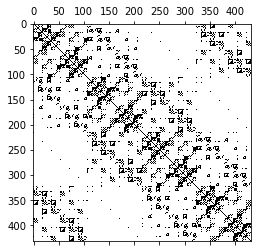

In [7]:
plt.spy(H, precision=0.1)

In [68]:
reload(principallayer)

<module 'transport.surface.principallayer' from '/home/gag/Libraries/transport/transport/surface/principallayer.py'>

In [69]:
se = principallayer.PrincipalSelfEnergy(kpts_t,(h_kii,s_kii),(h_kij,s_kij))

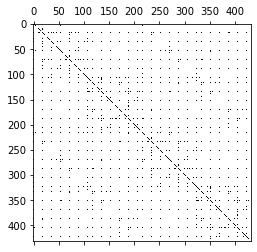

In [70]:
plt.spy(se.get_G(2.),precision=0.1)

In [71]:
energies = np.arange(-4,4,1e-2)
dos = np.empty_like(energies)
for e, energy in enumerate(energies):
    dos[e] = se.dos(energy)

In [73]:
se.eta

1e-05

In [88]:
def func(*args, **kwargs):
    pass

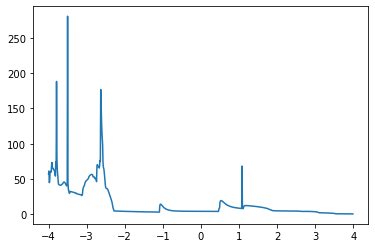

In [72]:
plt.plot(energies, dos)

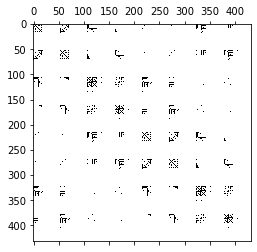

In [60]:
plt.spy(se.retarded(0.2), precision=0.1)

In [74]:
from gpaw.lcao.tools import remove_pbc, get_lead_lcao_hamiltonian
from gpaw import GPAW

In [79]:
calc = GPAW('3D/even/sc.gpw')
calc.atoms.set_calculator(calc)

In [81]:
tkpts_kc, tweights_k, H_skMM, S_kMM = get_lead_lcao_hamiltonian(
    calc, direction='x')

In [82]:
S = S_kMM[0]
H = H_skMM[0, 0] - calc.get_fermi_level() * S
remove_pbc(calc.atoms, H, S, d=0)

In [83]:
ii = lambda A: A[:A.shape[0]//2,:A.shape[0]//2]
ij = lambda A: A[:A.shape[0]//2,A.shape[0]//2:2*A.shape[0]//2]

In [84]:
se_gpaw = LeadSelfEnergy((ii(H),ii(S)),(ij(H),ij(S)),(ij(H),ij(S)))

In [85]:
dos_gpaw = np.empty_like(energies)
for e, energy in enumerate(energies):
    dos_gpaw[e] = se_gpaw.dos(energy)

KeyboardInterrupt: 